## Observations and Insights

## Dependencies and starter code

In [14]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Read the mouse data and the study results
mouse_metadata = pd.read_csv("data/Mouse_metadata.csv")
study_results = pd.read_csv("data/Study_results.csv")

# Combine the data into a single dataset
mouse_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

mouse_df.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


## Summary statistics

In [2]:
## Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# create summary dataframe with requested statistics
summary_df = pd.DataFrame({"Mean Tumor Volume (mm3)": mouse_df["Tumor Volume (mm3)"].groupby(mouse_df["Drug Regimen"]).mean(),
                          "Median Tumor Volume (mm3)": mouse_df["Tumor Volume (mm3)"].groupby(mouse_df["Drug Regimen"]).median(),
                          "Variance of Tumor Volume (mm3)": mouse_df["Tumor Volume (mm3)"].groupby(mouse_df["Drug Regimen"]).var(),
                          "Standard Deviation for Tumor Volume (mm3)": mouse_df["Tumor Volume (mm3)"].groupby(mouse_df["Drug Regimen"]).std(),
                          "SEM of Tumor Volume (mm3)": mouse_df["Tumor Volume (mm3)"].groupby(mouse_df["Drug Regimen"]).sem()})
summary_df

,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Variance of Tumor Volume (mm3),Standard Deviation for Tumor Volume (mm3),SEM of Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

In [3]:
## Generate a bar plot showing number of data points for each treatment regimen using pandas and pyplot

# create sorted list of drug names
drug_list = sorted(mouse_df["Drug Regimen"].unique().tolist())

# make tick locations with drug_list
tick_locations = np.arange(len(drug_list))

# title and labels
bar_title = "Number of Data Points per Drug Regimen"
bar_xlabel = "Drug Regimen"
bar_ylabel = "Number of Data Points"

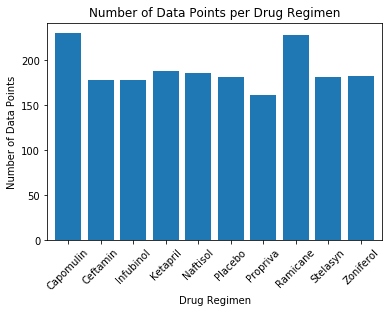

In [4]:
## Bar Plot using Pandas

# create a new series with only the drug name and number of data points
drug_and_count = mouse_df["Tumor Volume (mm3)"].groupby(mouse_df["Drug Regimen"]).count()

# create bar plot using pandas
drug_and_count.plot(kind="bar", legend=False, width=.8)

# assign xticks and rotate 45 degrees
plt.xticks(tick_locations, drug_list, rotation=45)

# give plot a title and label
plt.title(bar_title)
plt.ylabel(bar_ylabel)

# display plot
plt.show()

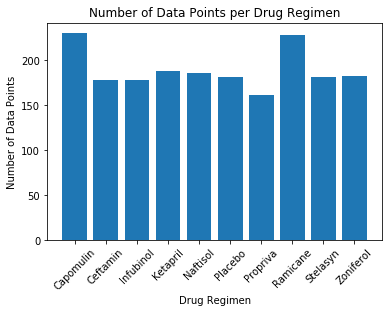

In [5]:
# Bar Plot using PyPlot

# create bar plot using pyplot
plt.bar(drug_list, mouse_df["Drug Regimen"].groupby(mouse_df["Drug Regimen"]).value_counts())

# assign xticks and rotate 45 degrees
plt.xticks(tick_locations, drug_list, rotation=45)

# give plot a title and label
plt.title(bar_title)
plt.xlabel(bar_xlabel)
plt.ylabel(bar_ylabel)

# display plot
plt.show()

## Pie plots

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pandas and pyplot

# title and label for plots
pie_title = "Distribution of Female versus Male Mice"
pie_ylabel = "Sex"

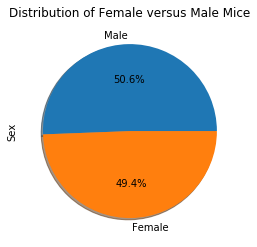

In [7]:
## Pie Plot using Pandas

# create series for gender counts
gender_s = mouse_df["Sex"].value_counts()

# create the pie plot
gender_s.plot(kind="pie", autopct='%1.1f%%', shadow=True)

# assign title to plot
plt.title(pie_title)

# show plot
plt.show()

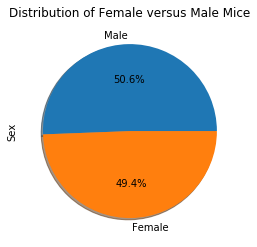

In [8]:
## Pie Plot using PyPlot

# gender list for plot labels
gender_list = ["Male", "Female"]

# create plot
plt.pie(gender_s, labels=gender_list, autopct='%1.1f%%', shadow=True)

# assign title and label to plot
plt.title(pie_title)
plt.ylabel(pie_ylabel)

# show plot
plt.show()

## Quartiles, outliers and boxplots

In [9]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment
# regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.

# find final tumor volume for each mouse
final_size = mouse_df.loc[mouse_df["Timepoint"] == 45]

# calculate median tumor size by drug regimen
median_size_df = pd.DataFrame({"Median Final Tumor Volume (mm3)": final_size["Tumor Volume (mm3)"].groupby([final_size["Drug Regimen"]]).median()})

# find 4 smallest values
best_regimens = median_size_df.nsmallest(4, "Median Final Tumor Volume (mm3)")

# make a list of the four most promising treatments (based on median final tumor volume)
best_regimens_list = best_regimens.index.values.tolist()

# find all mice that had this treatment in final_size
best_drugs = final_size.loc[final_size["Drug Regimen"].isin(best_regimens_list)]

# create a list of all the tumor final volumes
volumes = best_drugs["Tumor Volume (mm3)"]
volumes_list = best_drugs["Tumor Volume (mm3)"].tolist()

# calculate quartiles and IQR
quartiles = volumes.quantile([.25,.5,.75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
iqr = upperq-lowerq

# calculate upper and lower boundaries
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

# determine if there are any outliers in the dataset
outliers1 = best_drugs.loc[best_drugs["Tumor Volume (mm3)"] > upper_bound, "Tumor Volume (mm3)"].tolist()
outliers2 = best_drugs.loc[best_drugs["Tumor Volume (mm3)"] < lower_bound, "Tumor Volume (mm3)"].tolist()
outliers = outliers1 + outliers2

# remove any outliers from the dataset
for outlier in outliers:
    if outlier in volumes_list: volumes_list.remove(outlier)

# print out IQR, upper and lower bounds, and outliers
print(f"The IQR for Final Tumor Volume is: {round(iqr, 2)} mm3\n")
print(f"Values below {round(lower_bound, 2)} cound be outliers.")
print(f"Values above {round(upper_bound, 2)} cound be outliers.\n")
print(f"The following outliers have been found and thrown out of the dataset:\n"
      f"{outliers}")

The IQR for Final Tumor Volume is: 28.04 mm3

Values below -8.66 cound be outliers.
Values above 103.49 cound be outliers.

The following outliers have been found and thrown out of the dataset:
[]


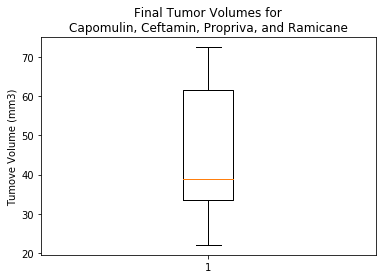

In [12]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
best_regimens_list.sort()
ax1.set_title(f"Final Tumor Volumes for\n"
              f"{best_regimens_list[0]}, {best_regimens_list[1]}, {best_regimens_list[2]}, and {best_regimens_list[3]}")
ax1.set_ylabel("Tumove Volume (mm3)")
plt.boxplot(volumes_list)

plt.show()

## Line and scatter plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# probably need bins here
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]

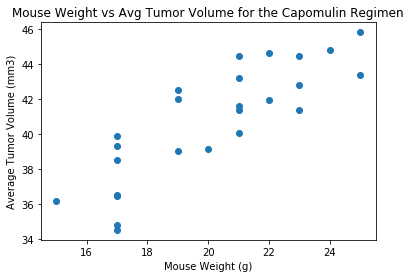

In [15]:
## Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# create data frame with only Capomulin data
capomulin_df = mouse_df.loc[mouse_df["Drug Regimen"] == "Capomulin", :]

# create data frame with average tumor volume and average weight per mouse on Capomulin
size_and_weight = pd.DataFrame(
    {
        "Avg Tumor Volume (mm3)": capomulin_df["Tumor Volume (mm3)"].groupby(capomulin_df["Mouse ID"]).mean(),
        "Avg Weight (g)": capomulin_df["Weight (g)"].groupby(capomulin_df["Mouse ID"]).mean()
    }
)

# create scatter plot
plt.scatter(size_and_weight["Avg Weight (g)"], size_and_weight["Avg Tumor Volume (mm3)"])

# give plot title and labels
plt.title("Mouse Weight vs Avg Tumor Volume for the Capomulin Regimen")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# display plot
plt.show()

The r-value is: 0.8419363424694718
The r-squared is: 0.7088568047708717


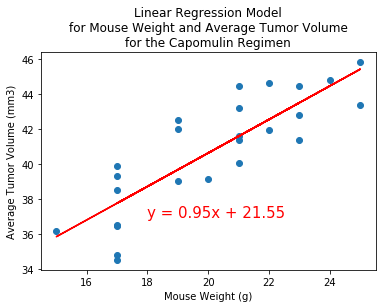

In [16]:
# Calculate the correlation coefficient and linear regression model for 
# mouse weight and average tumor volume for the Capomulin regimen

x_values = size_and_weight["Avg Weight (g)"]
y_values = size_and_weight["Avg Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {str(round(slope, 2))}x + {str(round(intercept, 2))}"
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (18, 37), fontsize=15, color="red")

plt.title(
    f"Linear Regression Model\n"
    f"for Mouse Weight and Average Tumor Volume\n"
    f"for the Capomulin Regimen")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

rsquared = rvalue ** 2
print(f"The r-value is: {rvalue}\n"
      f"The r-squared is: {rsquared}")

plt.show()